In [1]:
!nvidia-smi

Tue Jun  3 08:33:39 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   44C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
project_path = '/content/drive/MyDrive/EdgeAIProject_TruongHuyHoa'
os.chdir(project_path)

HOME = os.getcwd()
print("Current working directory:", os.getcwd())

Current working directory: /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa


In [4]:
# Pip install method (recommended)

!pip install ultralytics -q

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [8]:
%cd {HOME}
dataset_location = os.path.join(HOME, "selected_data")
!yolo task=detect mode=train model=yolov10n.pt data="{dataset_location}/data.yaml" epochs=50 imgsz=640 plots=True pretrained=True cache=False

/content
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov10n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience

/content


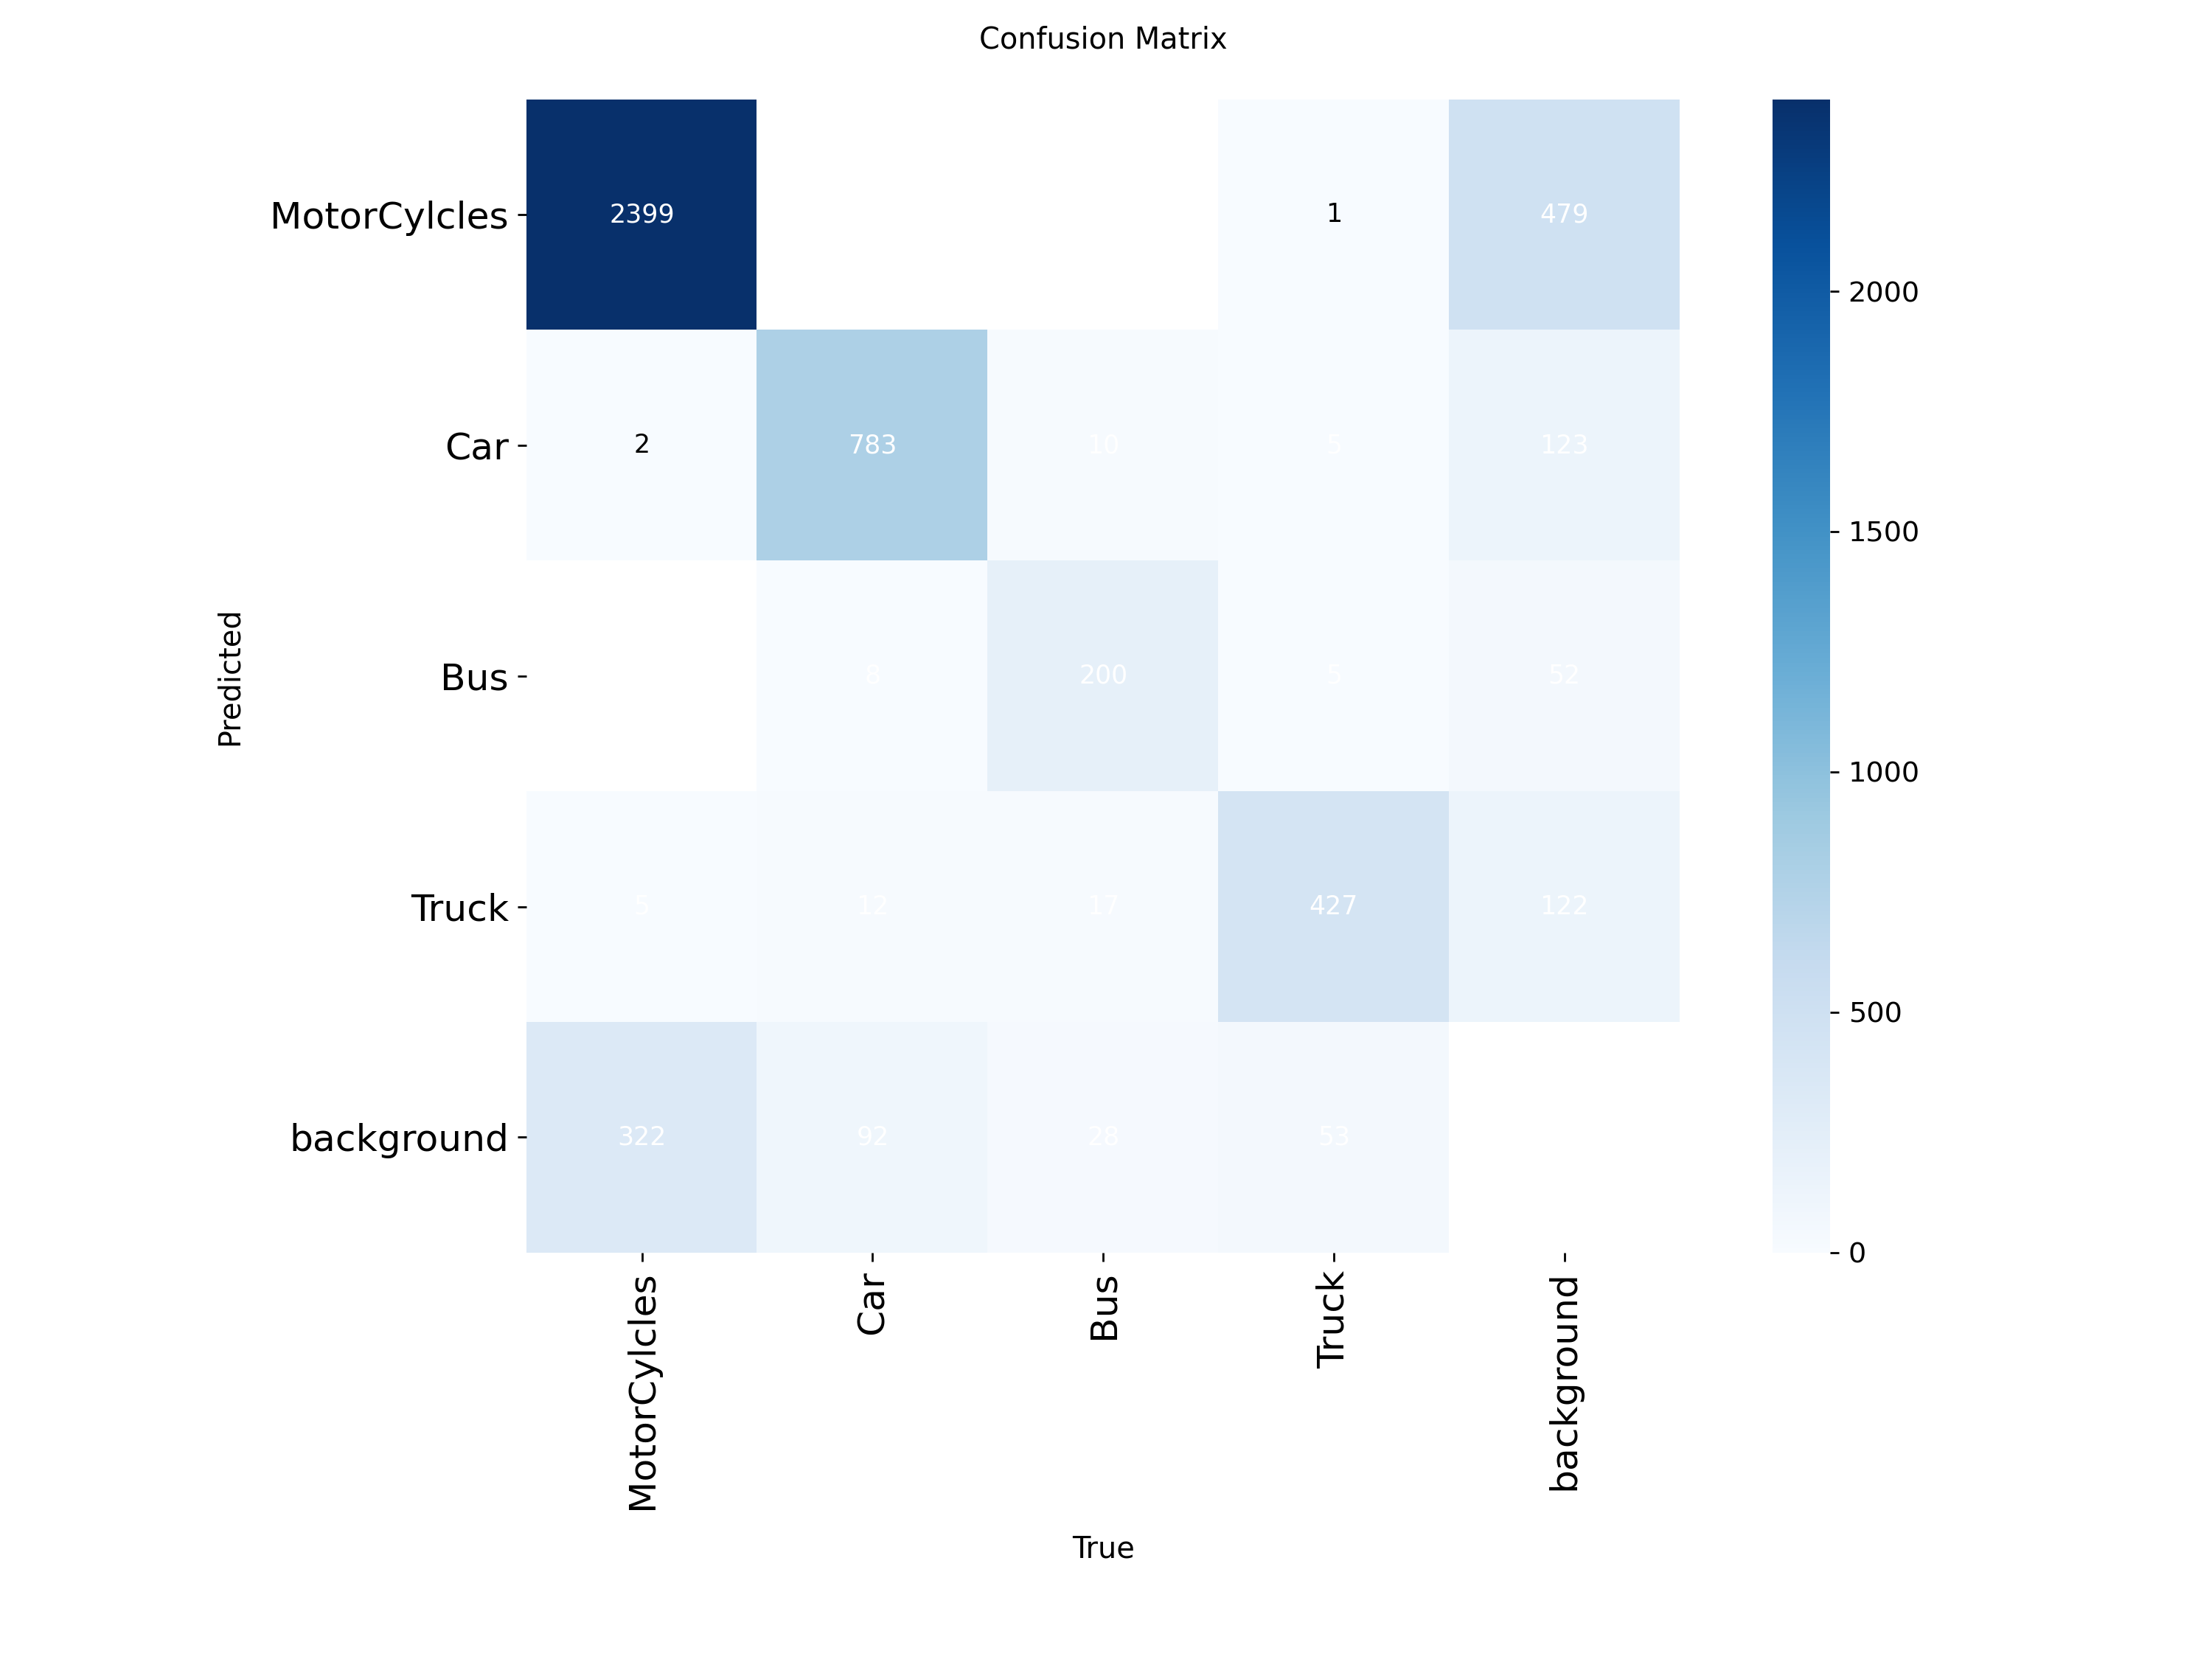

In [9]:
%cd {HOME}
Image(filename=f'runs/detect/train3/confusion_matrix.png', width=900)

/content


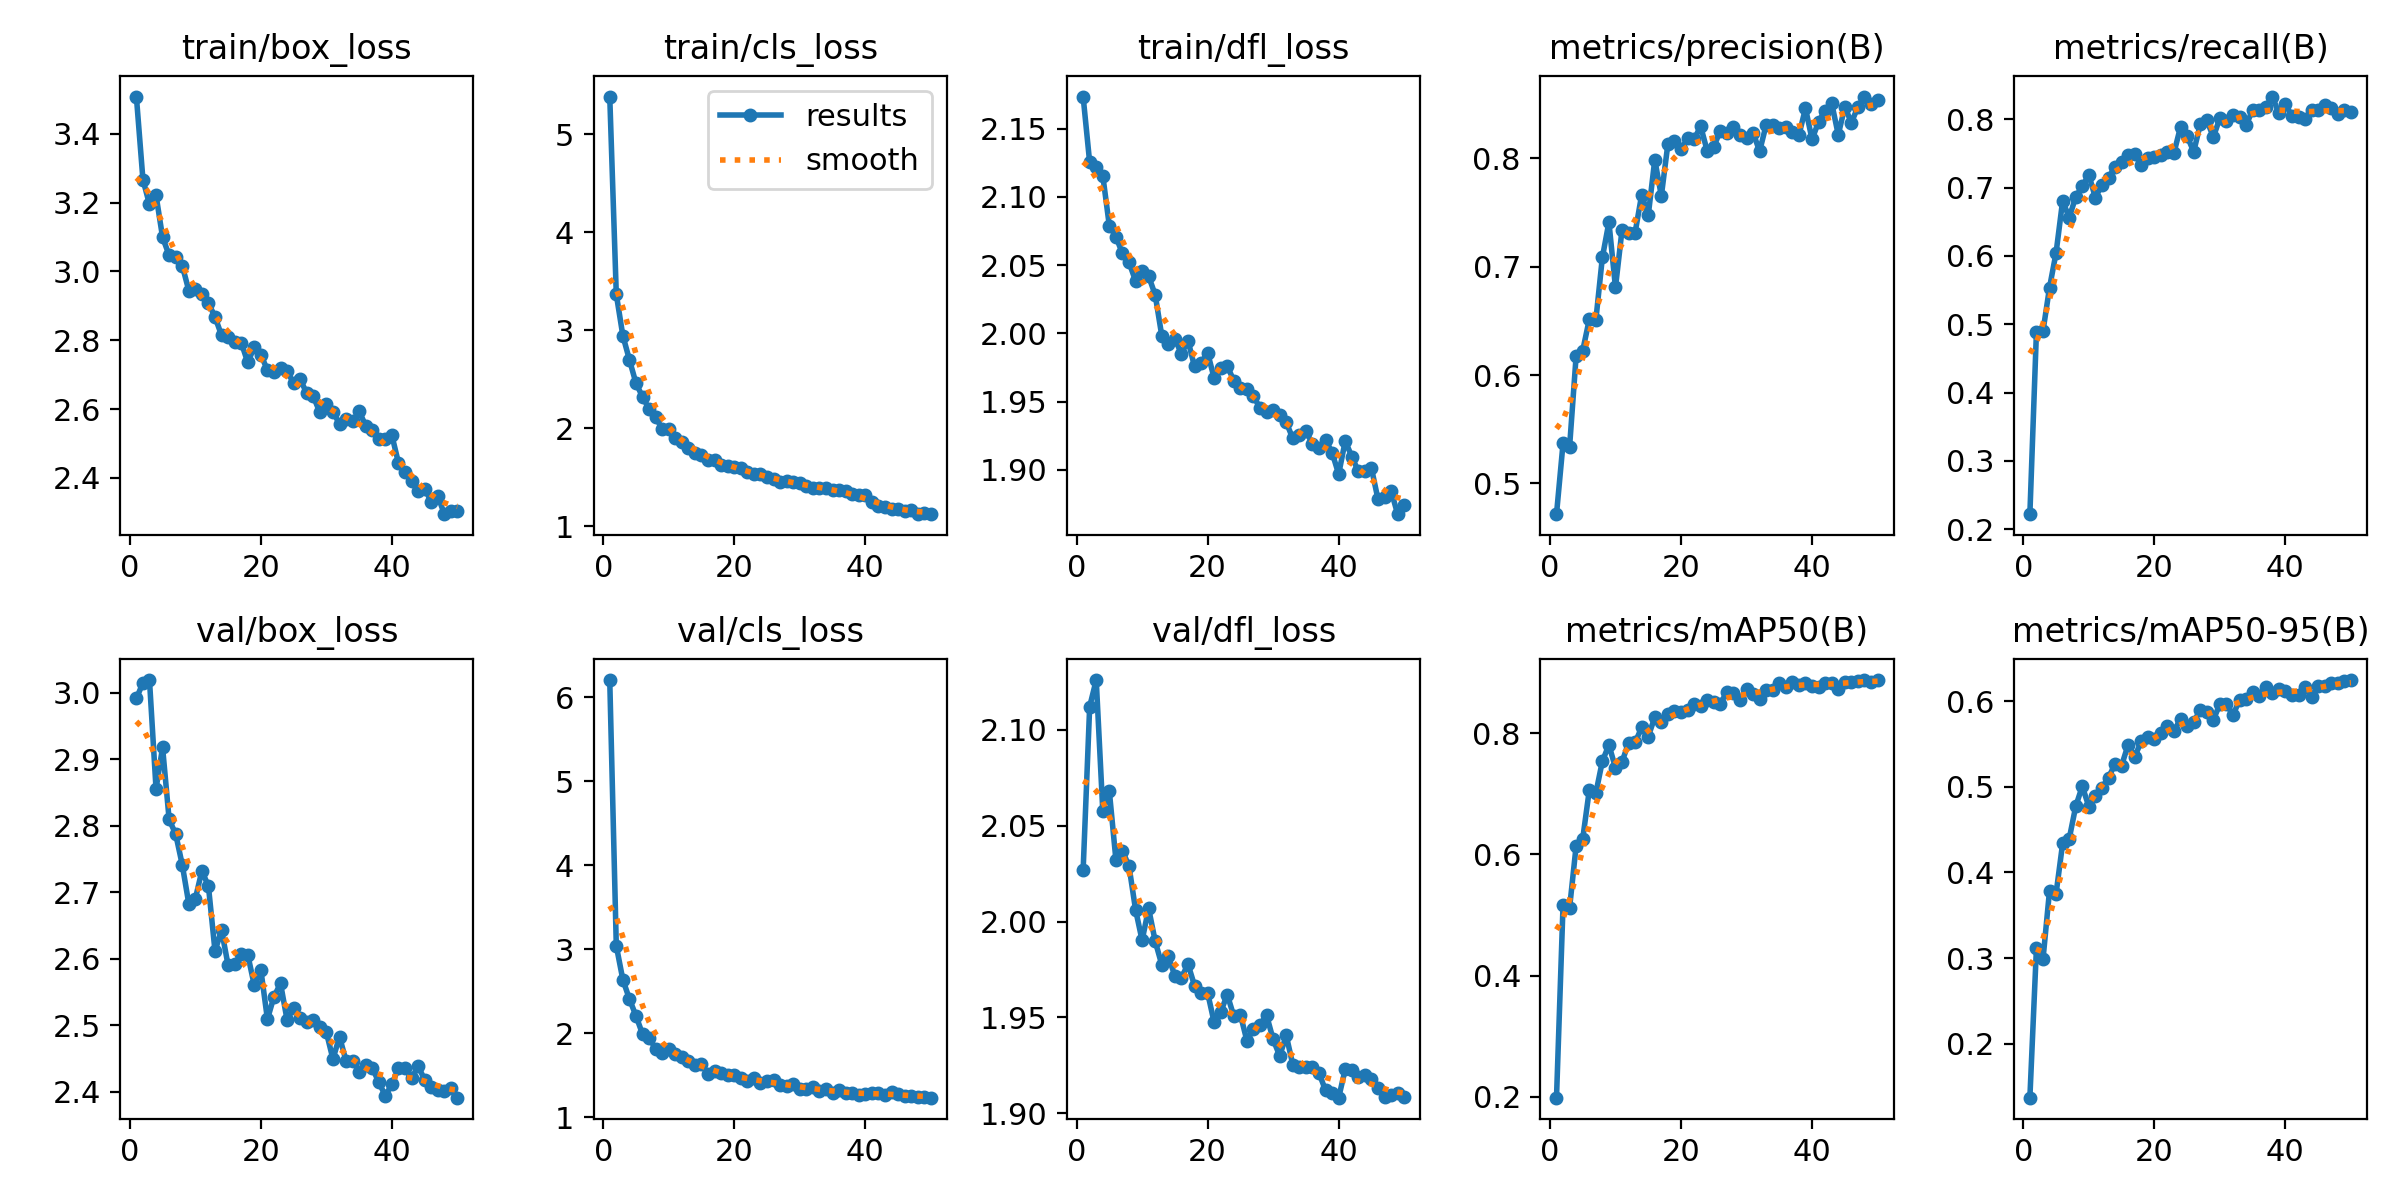

In [10]:
%cd {HOME}
Image(filename=f'runs/detect/train3/results.png', width=900)

/content


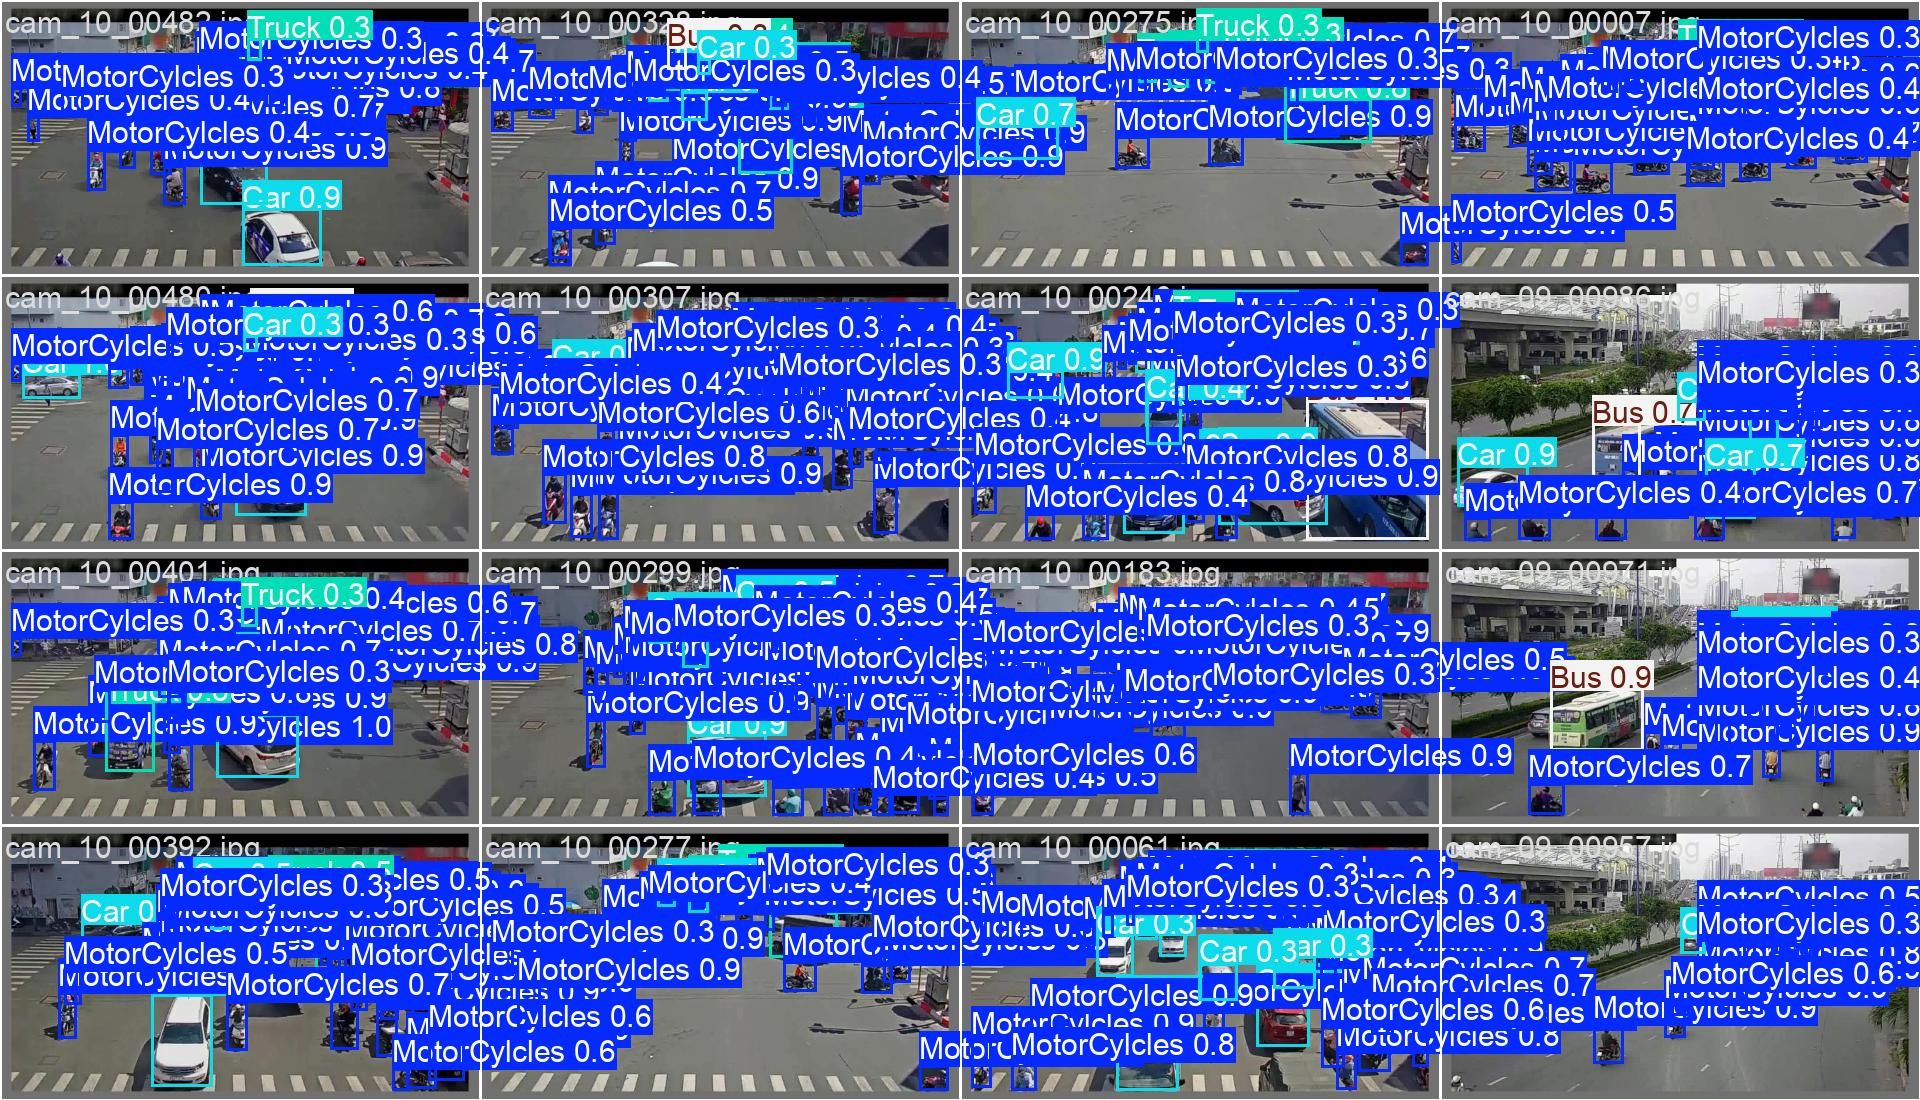

In [11]:
%cd {HOME}
Image(filename=f'runs/detect/train3/val_batch0_pred.jpg', width=900)

In [12]:
%cd {HOME}

!yolo task=detect mode=val model="{HOME}/runs/detect/train3/weights/best.pt" data="{dataset_location}/data.yaml"

/content
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,265,948 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.9±0.4 ms, read: 33.9±17.6 MB/s, size: 54.0 KB)
val: Scanning /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/labels.cache... 400 images, 0 backgrounds, 0 corrupt: 100% 400/400 [00:00<?, ?it/s]
val: /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/images/cam_04_00709.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 25/25 [00:06<00:00,  3.66it/s]
                   all        400       4369      0.853      0.813      0.888      0.625
          MotorCylcles        358       2728      0.892      0.805      0.914      0.549
                   Car        279        895      0.894      0.844      0.925      0.672
                   Bus        166        255      0.832    

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model="{HOME}/runs/detect/train3/weights/best.pt" conf=0.25 source="{dataset_location}/val/images" save=True

/content
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv10n summary (fused): 102 layers, 2,265,948 parameters, 0 gradients, 6.5 GFLOPs

image 1/400 /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/images/cam_01_00072.jpg: 384x640 5 MotorCylcless, 2 Cars, 4 Trucks, 46.7ms
image 2/400 /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/images/cam_01_00197.jpg: 384x640 3 MotorCylcless, 1 Car, 6 Trucks, 9.1ms
image 3/400 /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/images/cam_01_00212.jpg: 384x640 1 MotorCylcles, 5 Trucks, 8.5ms
image 4/400 /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/images/cam_01_00314.jpg: 384x640 2 Cars, 5 Trucks, 8.8ms
image 5/400 /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/images/cam_01_00323.jpg: 384x640 2 Cars, 6 Trucks, 10.1ms
image 6/400 /content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/selected_data/val/images/cam_01_0

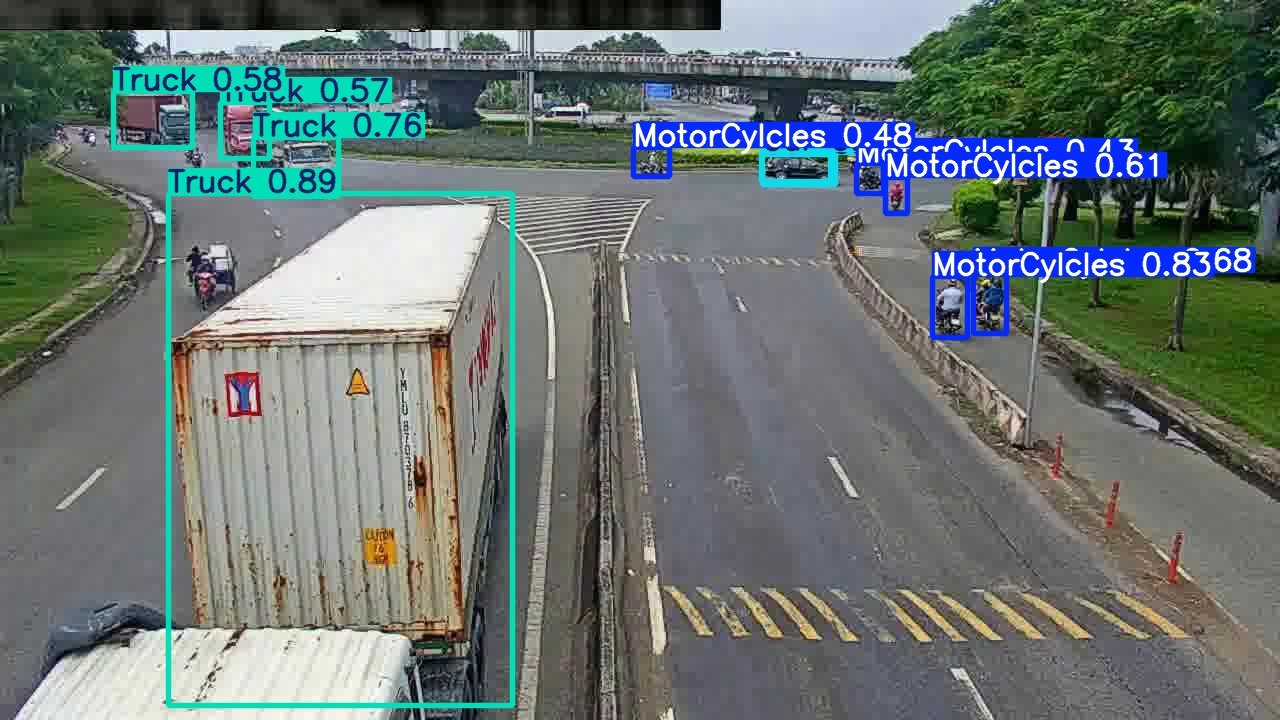

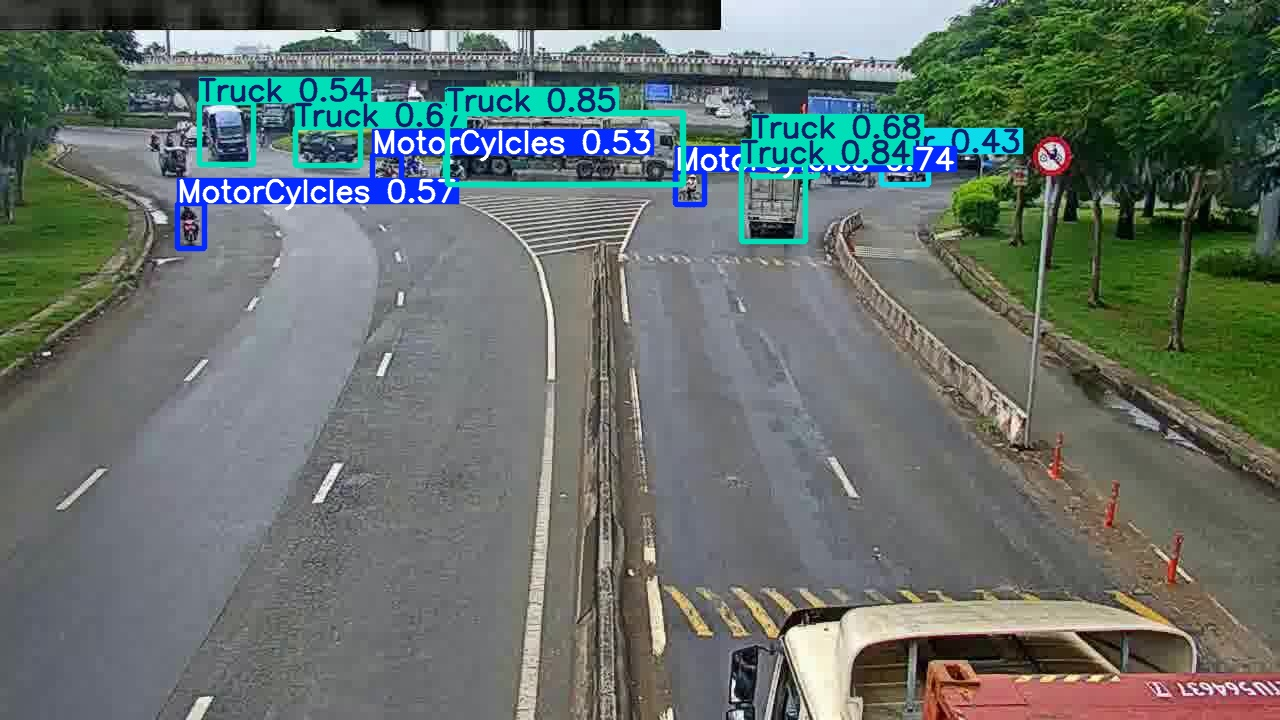

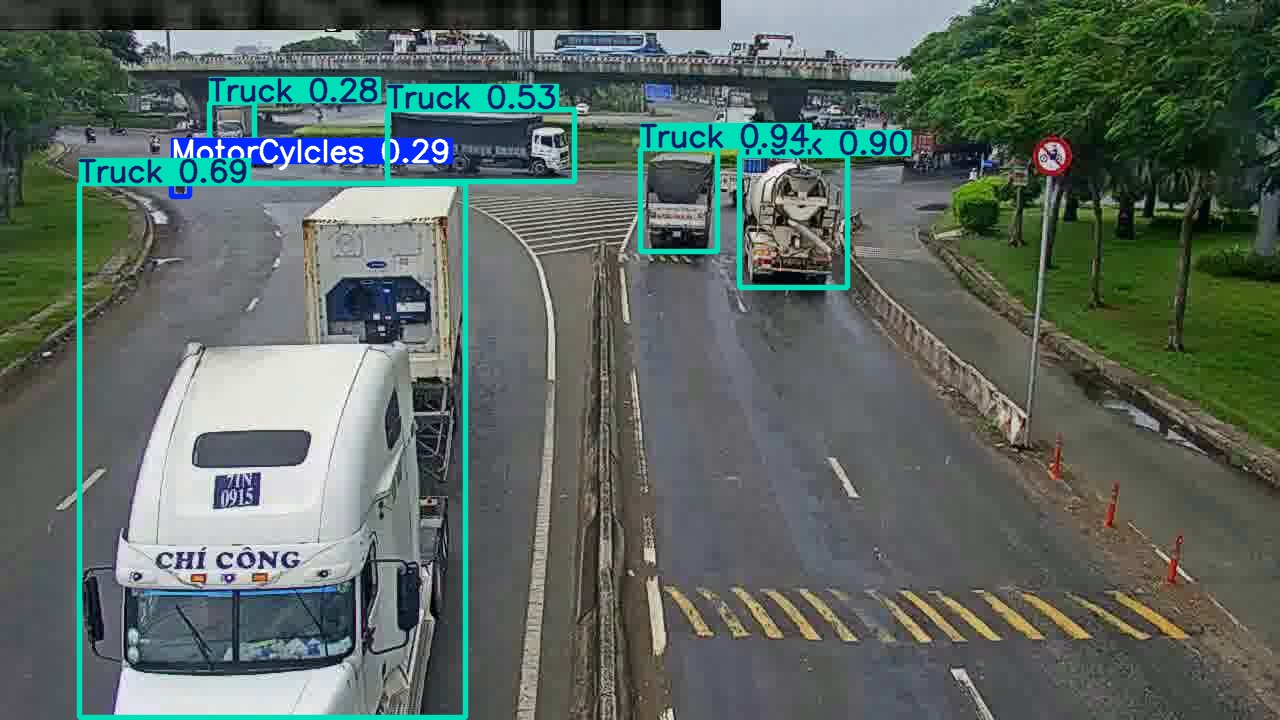

In [14]:
import glob
from IPython.display import Image, display

# Define the base path where the folders are located
base_path = f'{HOME}/runs/detect/'

# List all directories that start with 'predict' in the base path
subfolders = [os.path.join(base_path, d) for d in os.listdir(base_path)
              if os.path.isdir(os.path.join(base_path, d)) and d.startswith('predict')]

# Find the latest folder by modification time
latest_folder = max(subfolders, key=os.path.getmtime)

image_paths = glob.glob(f'{latest_folder}/*.jpg')[:3]

# Display each image
for image_path in image_paths:
    display(Image(filename=image_path, width=600))
    print("\n")

In [15]:
%cd {HOME}

!yolo export model="{HOME}/runs/detect/train3/weights/best.pt" format=onnx

/content
Ultralytics 8.3.148 🚀 Python-3.11.12 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/
YOLOv10n summary (fused): 102 layers, 2,265,948 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from '/content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/runs/detect/train3/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 300, 6) (5.5 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.56', 'onnxruntime'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 2.5s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.56...
ONNX: export success ✅ 5.1s, saved as '/content/drive/MyDrive/EdgeAIProject_TruongHuyHoa/runs/detect/train3/weights/best.onnx' (8.9 MB)

Export c